<a href="https://colab.research.google.com/github/drhoffma/HarperIDEAShopCVCC/blob/main/lessons/03_Computer_Vision_Basics_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![](https://github.com/drhoffma/HarperIDEAShopCVCC/blob/main/colab_template/header_image.png?raw=true)

# Welcome to **Harper College's IDEAShop** curriculum!

**Course Title:** *Computer Vision, Cameras, & Code*

**Quick Links:** [Homepage](https://tinyurl.com/harpercv-home) | [Syllabus](https://tinyurl.com/harpercv-syllabus) | [Blackboard](#) | [Instructor](https://davidrhoffman.net)

***Terms of use:*** *This course is public domain. If you'd like to use content from this course, please request consent by [contacting Harper College MakerSpace](https://www.harpercollege.edu/maker/contact/index.php).*

---

## Load an image


In [15]:
# code playground
! wget https://github.com/drhoffma/HarperIDEAShopCVCC/raw/main/lessons/images/oberwesel_2.jpg

--2021-07-27 14:04:43--  https://github.com/drhoffma/HarperIDEAShopCVCC/raw/main/lessons/images/oberwesel_2.jpg
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/drhoffma/HarperIDEAShopCVCC/main/lessons/images/oberwesel_2.jpg [following]
--2021-07-27 14:04:44--  https://raw.githubusercontent.com/drhoffma/HarperIDEAShopCVCC/main/lessons/images/oberwesel_2.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 445750 (435K) [image/jpeg]
Saving to: ‘oberwesel_2.jpg.1’

oberwesel_2.jpg.1   100%[===================>] 435.30K  --.-KB/s    in 0.03s   

2021-07-27 14:04:44 (15.7 MB/s) - ‘oberwesel_2.jpg.1’ s

Image shape: (499, 500, 3)


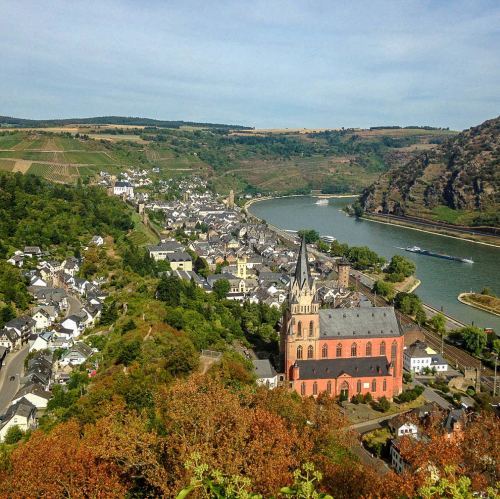

In [16]:
# imports
import cv2
import imutils
from google.colab.patches import cv2_imshow

# load an image
image = cv2.imread("oberwesel_2.jpg")

# resize the image
resized = imutils.resize(image, width=500)
print("Image shape: {}".format(str(resized.shape)))
cv2_imshow(resized)

## ROI (re-visit)

In [ ]:
# code playground

# slicing via image[y1:y2, x1:x2]

# Your task: extract an ROI so that the sky is no-longer present
# using the `resized` image

cropped = resized[y1:y2, x1:x2]


## Drawing

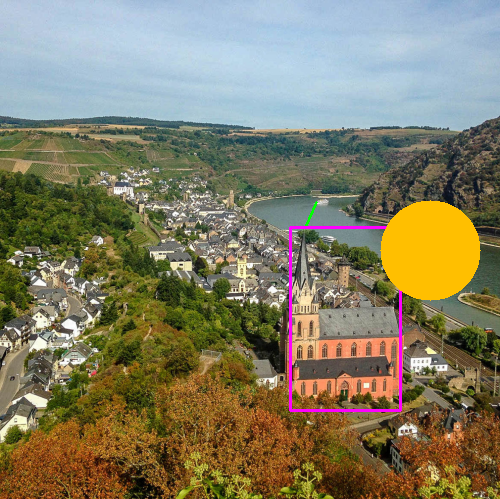

In [37]:
# code playground

# Use the same image for all of the below steps
drawing = resized.copy()

# draw a green line from the church steeple top to the boat
green = (0, 255, 0)
cv2.line(drawing, (305, 227), (316, 202), green, 2)

# draw a purple rectangle around the church
purple = (255, 0, 255)
cv2.rectangle(drawing, (290, 227), (400, 410), purple, 2)

# draw a yellow circle around the boat
yellow = (0, 191, 255)
cv2.circle(drawing, (430, 250), 50, yellow, -1)
cv2_imshow(drawing)

## Masks

(499, 500, 3)


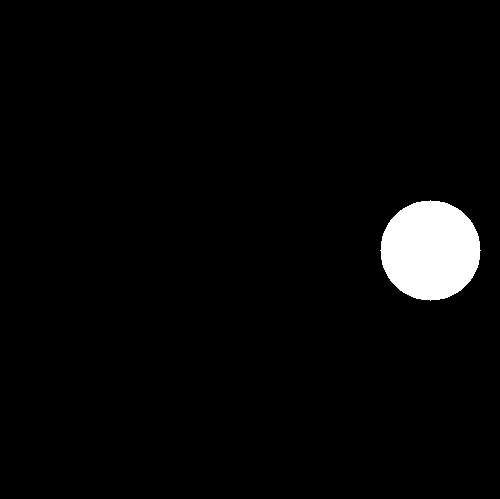

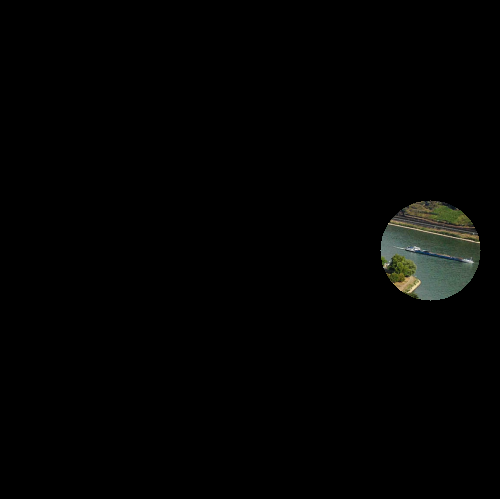

In [46]:
# code playground

from numpy import zeros, ones
import numpy as np

# create a blank image
shape = resized.shape
print(shape)
shape = list(shape)
mask = zeros(shape)

# display the blank image
#cv2_imshow(blank)

# draw a white solid circle in the middle of the blank image
cv2.circle(mask, (430, 250), 50, (255, 255, 255), -1)

# convert to single channel
mask = mask.astype(np.uint8)
mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)

# display
cv2_imshow(mask)


# mask out the circle
result = cv2.bitwise_and(resized, resized, mask=mask)
cv2_imshow(result)

## Blurring

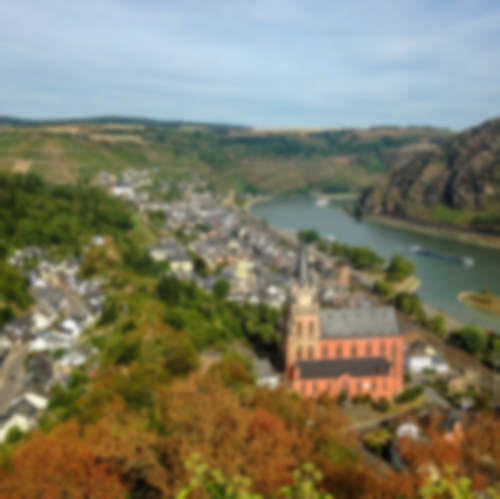

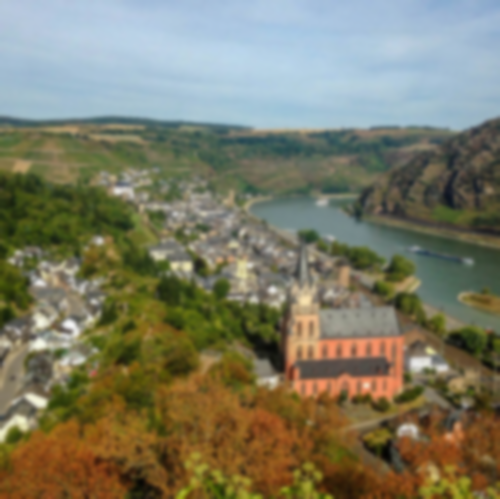

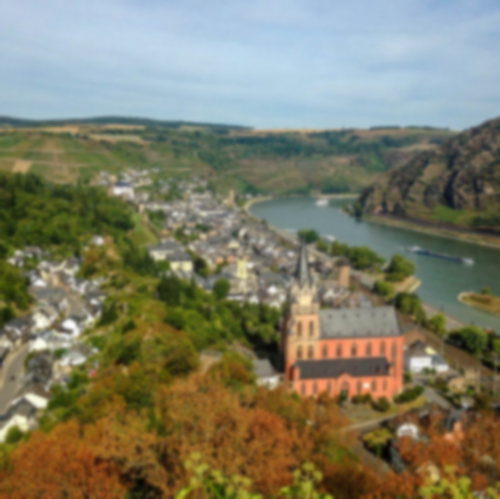

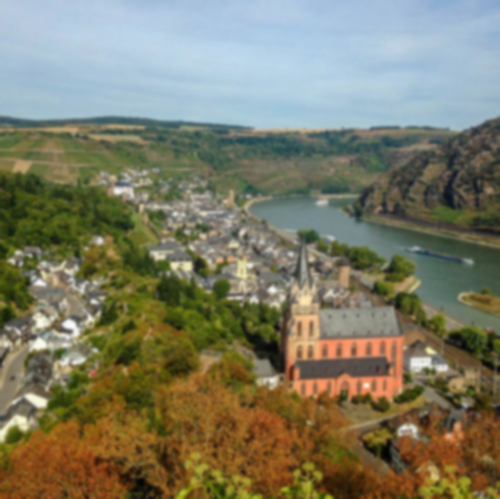

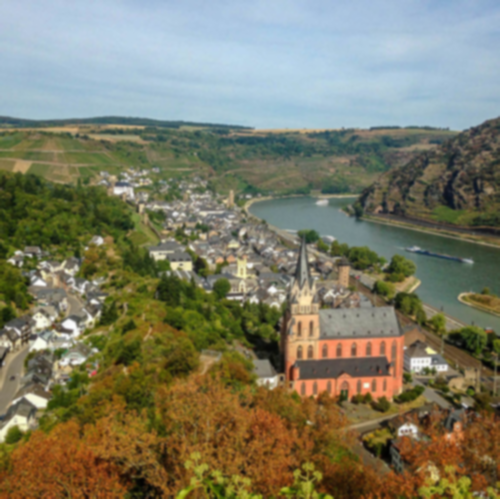

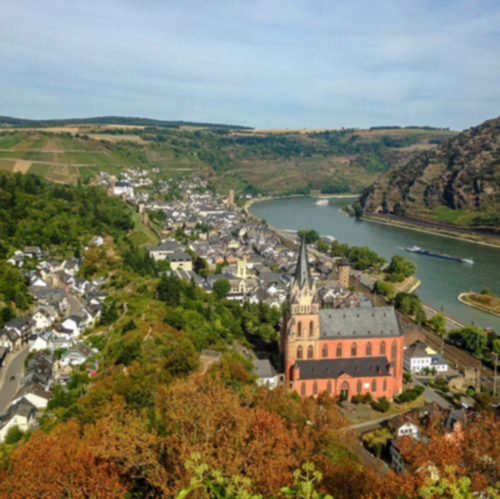

In [48]:
# code playground

# Gaussian blur
blurred = cv2.GaussianBlur(resized, (11, 11), 0)
#cv2_imshow(blurred)

# Gaussian blur with decreasing kernel size
# make a for loop that displays a blurred image with progressively smaller kernels
# start with (13, 13) and work down to (5, 5)
kernels = [(13, 13), (11, 11), (9, 9), (7, 7), (5, 5), (3, 3)]

# blurring loop
for k in kernels:
  blurred = cv2.GaussianBlur(resized, k, 0)
  cv2_imshow(blurred)

